In [39]:
import tensorflow as tf
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt 

Using the MNIST Fashion Dataset that includes 60 000 images for training and 10 000 images for validating/testing. The clothing articles are of pixel art.

In [40]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [41]:
train_images.shape

(60000, 28, 28)

train_images.shape = (60000, 28, 28) which is 60 000 images that are made up of 28x28 pixels (784 total)

In [42]:
train_images[0,23,23]

194

In [43]:
train_labels[:10] # 10 first training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [44]:
clothing_articles = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

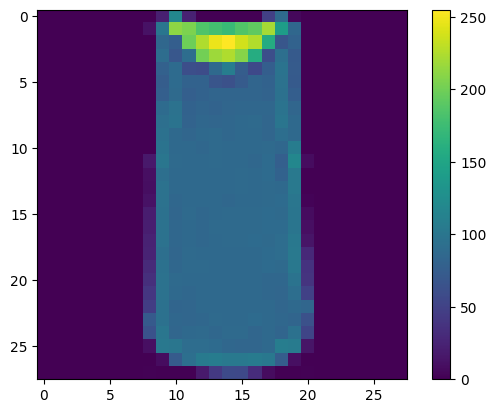

In [45]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

The last step before creating our model is to preprocess our data. This is an important step in neural networks. A lot of times when we have our data, we have it random forms, or we're missing data, or there's information we don't know or that we haven't seen. And for this we typically need to preprocess our data. What we are doing here is squishing our values between 0 and 1. Typically it is a good idea to get all your input values in a neural network in between that range, or -1 and 1. As small as possible. This is because at the start of our network the weights and biases are in between range 0 and 1, unless you change the value. So if you have massive input values, but tiny weights and biases, you are going to get a mismatch and you will make it harder for the model to classify your information. It is easier for the model to process the input if they are smaller.

In [46]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Now it is time to build the model! We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right) 

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer (1)
    keras.layers.Dense(128, activation="relu"), # hidden layer (2)
    keras.layers.Dense(10, activation="softmax") # output layer (3)
])

Flatten means we are taking the 28x28 pixel matrix and flattening it to 784. Afterwards we use Dense which means that the layer between 1 and 2 are densely connected. We choose 128 different neurons for the hidden layer, this is contextual. The AF we use for these neurons is the Rectified Linear Unit and then after we also have a dense layer which is the output layer. We have 10 different neurons because there are 10 different outcomes (clothing articles)

The last step in building the model is to define the loss function, optimizer and metrics we would like to track.

In [48]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [49]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 2s 847us/step - loss: 0.5028 - accuracy: 0.8248


In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 0s 471us/step - loss: 0.4373 - accuracy: 0.8451
Test accuracy:  0.8450999855995178


To make predictions we simply need to pass an array of data in the form we've specified in the input layer to .predict() method.

In [51]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 517us/step


This method returns to uas an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.

The largest number is the image we found it most likely clothing article to be:  [1.4933141e-05 1.8224517e-06 1.9011828e-06 3.5845363e-07 1.1792370e-06
 2.7782198e-03 1.4636803e-06 9.9622333e-01 3.0112528e-04 6.7566452e-04]
The highest:  7
Which is this clothing article:  Sneaker
Image of clothing article: 


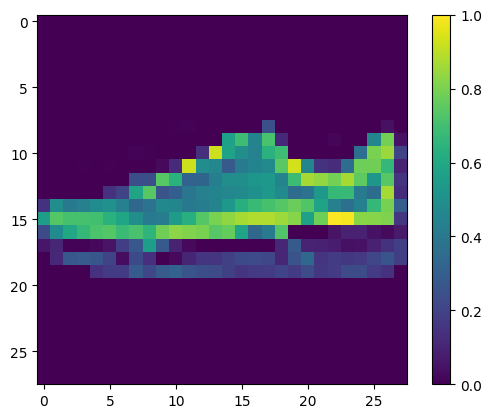

In [58]:
print("The largest number is the image we found it most likely clothing article to be: ",predictions[9])
print("The highest: ",np.argmax(predictions[9]))
print("Which is this clothing article: ",clothing_articles[np.argmax(predictions[9])])
print("Image of clothing article: ")
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()